# Loading Images, Converting to Arrays and Splitting

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from tensorflow.keras.preprocessing.image import load_img
from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Regularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout



In [3]:
from tensorflow.keras import backend as K

K.clear_session()

In [4]:
X = []
y = []
classes = ['empty', 'bird', 'mug', 'sunglass']
base_path = 'imageclassifier/data/'

for i, target in enumerate(classes):
      files = os.listdir(base_path+target)  #gets the list of all files and directories in the specified directory
      for file in files:
         # load the image
         img = load_img(base_path+target+'/'+file)
         # convert it to an array
         img_array = asarray(img)
         # append the array to X
         X.append(img_array)
         # append the numeric target to y
         y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [4]:
X

array([[[[164, 161, 153],
         [164, 161, 153],
         [165, 160, 151],
         ...,
         [175, 171, 168],
         [174, 173, 166],
         [175, 174, 167]],

        [[165, 162, 154],
         [165, 162, 154],
         [167, 161, 152],
         ...,
         [174, 171, 165],
         [174, 173, 166],
         [175, 174, 167]],

        [[166, 163, 153],
         [167, 164, 154],
         [167, 165, 152],
         ...,
         [175, 172, 164],
         [177, 173, 165],
         [177, 173, 165]],

        ...,

        [[165, 166, 163],
         [168, 168, 166],
         [165, 166, 161],
         ...,
         [ 77,  51,  44],
         [ 70,  46,  40],
         [ 63,  39,  33]],

        [[168, 168, 164],
         [168, 168, 164],
         [168, 165, 159],
         ...,
         [ 76,  52,  44],
         [ 70,  46,  38],
         [ 62,  38,  30]],

        [[166, 164, 162],
         [166, 164, 162],
         [167, 160, 158],
         ...,
         [ 75,  51,  43],
        

In [5]:
y

array([0, 2, 1, ..., 3, 3, 0])

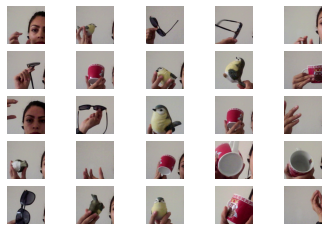

In [6]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [7]:
X.shape, y.shape

((2155, 224, 224, 3), (2155,))

In [5]:
#spliting the data
xtrain = X[:1855,:,:,:]
xtest = X[1855:,:,:,:]

ytrain = y[:1855]
ytest = y[1855:]

In [9]:
xtrain.shape, xtest.shape

((1855, 224, 224, 3), (300, 224, 224, 3))

In [10]:
xtrain[31].shape

(224, 224, 3)

In [6]:
ytest_true = ytest.copy()

# Normalizing the data to help with the training (Scale these values to a range of 0 to 1)

In [7]:
xtrain = xtrain / 255.0

xtest = xtest / 255.0

# One-Hot-Encoding the labels

In [8]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

# Building a CNN with 8 Layers

## Defining the model

In [14]:
from tensorflow.keras import backend as K
K.clear_session()

In [15]:
model = Sequential([
    
    # first convolutional and max pooling layer
    Conv2D(filters=6,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu",
          input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2),
                strides=(2, 2),
                padding="valid"),
    #BatchNormalization(), # optional
    
    # Second convolutional and max pooling layer
    Conv2D(filters=16,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu"),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="valid"),
    #BatchNormalization(), # optional
    
    # Flatten
    Flatten(),
    
    # Fully connected
    # layer 1
    Dense(120, activation="relu"),
    #Dropout(0.2), # optional
    
    # layer 2
    Dense(84, activation="relu"),
    #Dropout(0.2), # optional
    
    # Output layer
    Dense(4, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 16)      2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 44944)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5393400   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Compile the model

In [17]:
model.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

## Fit the model

In [18]:
fit_history = model.fit(xtrain, ytrain, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
47/47 [==============================] - 58s 1s/step - loss: 1.2923 - accuracy: 0.5249 - val_loss: 0.5636 - val_accuracy: 0.7790
Epoch 2/10
47/47 [==============================] - 47s 1s/step - loss: 0.3354 - accuracy: 0.8861 - val_loss: 0.3169 - val_accuracy: 0.8733
Epoch 3/10
47/47 [==============================] - 48s 1s/step - loss: 0.1184 - accuracy: 0.9616 - val_loss: 0.2271 - val_accuracy: 0.9353
Epoch 4/10
47/47 [==============================] - 50s 1s/step - loss: 0.0571 - accuracy: 0.9838 - val_loss: 0.1967 - val_accuracy: 0.9353
Epoch 5/10
47/47 [==============================] - 47s 1s/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.1658 - val_accuracy: 0.9488
Epoch 6/10
47/47 [==============================] - 49s 1s/step - loss: 0.0106 - accuracy: 0.9993 - val_loss: 0.2101 - val_accuracy: 0.9218
Epoch 7/10
47/47 [==============================] - 48s 1s/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.2235 - val_accuracy: 0.9434
Epoch 8/10
47/47 [==

## Evaluate model

findfont: Font family ['monaco'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monaco'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monaco'] not found. Falling back to DejaVu Sans.


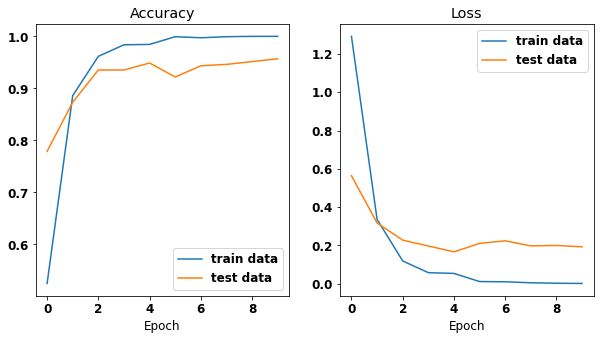

In [19]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.family"] = "monaco"
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "bold"
plt.subplot(1, 2, 1)
plt.plot(fit_history.history["accuracy"], label="train data")
plt.plot(fit_history.history["val_accuracy"], label="test data")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(fit_history.history["loss"], label="train data")
plt.plot(fit_history.history["val_loss"], label="test data")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend();

In [20]:
df_metrics = pd.DataFrame(fit_history.history)
df_metrics

,loss,accuracy,val_loss,val_accuracy
0,1.292263,0.524933,0.563633,0.778976
1,0.335391,0.886119,0.316920,0.873315
2,0.118407,0.961590,0.227132,0.935310
3,0.057119,0.983827,0.196694,0.935310
4,0.053168,0.984501,0.165818,0.948787
5,0.010638,0.999326,0.210122,0.921833
6,0.009430,0.997305,0.223509,0.943396
7,0.004272,0.999326,0.197119,0.946092
8,0.001898,1.000000,0.199276,0.951482
9,0.000759,1.000000,0.192188,0.956873


## Prediction

In [21]:
ypred = model.predict(xtest)

In [22]:
ypred[0]

array([3.4349014e-08, 9.9999678e-01, 1.2065103e-06, 1.9930123e-06],
      dtype=float32)

In [23]:
ytest_true[0]

1

In [24]:
np.argmax(ypred[0])

1

In [25]:
y_pred_labels = np.argmax(ypred, axis=1)
y_pred_labels

array([1, 3, 1, 3, 3, 2, 3, 1, 3, 2, 3, 3, 2, 0, 2, 3, 1, 3, 2, 3, 2, 1,
       2, 1, 3, 1, 1, 1, 0, 2, 3, 2, 1, 1, 3, 0, 1, 3, 3, 0, 2, 0, 1, 3,
       2, 2, 2, 1, 2, 1, 3, 0, 3, 0, 1, 2, 1, 0, 2, 0, 2, 3, 1, 0, 3, 0,
       2, 2, 3, 2, 0, 1, 2, 3, 0, 0, 2, 0, 2, 1, 3, 3, 0, 2, 2, 2, 3, 1,
       2, 3, 1, 3, 0, 3, 1, 3, 1, 0, 3, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 3,
       3, 2, 2, 0, 3, 3, 0, 0, 1, 2, 2, 3, 0, 0, 3, 2, 2, 3, 1, 3, 2, 2,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 3, 3, 0, 2, 1, 1, 3,
       0, 2, 2, 2, 2, 3, 3, 0, 1, 1, 0, 3, 0, 0, 2, 3, 1, 1, 3, 1, 2, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 3,
       0, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 2, 0, 0, 1, 0, 2, 3, 3, 0, 2, 2,
       2, 2, 3, 2, 3, 0, 3, 0, 2, 3, 1, 0, 1, 0, 3, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 0, 0, 1, 2, 1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 0, 3,
       0, 1, 2, 1, 0, 0, 2, 2, 3, 0, 3, 3, 3, 2, 2, 3, 3, 3, 0, 1, 3, 3,
       1, 2, 3, 2, 2, 1, 3, 3, 0, 1, 2, 3, 3, 1])

In [26]:
ytest_true

array([1, 3, 1, 3, 3, 2, 3, 1, 3, 2, 3, 3, 2, 0, 2, 3, 3, 3, 2, 3, 2, 1,
       2, 1, 3, 1, 1, 1, 0, 2, 3, 2, 1, 1, 3, 0, 3, 3, 3, 0, 2, 0, 1, 3,
       2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 3, 1, 0, 3, 0,
       2, 2, 3, 2, 0, 1, 2, 3, 0, 0, 2, 0, 2, 1, 3, 3, 0, 2, 2, 2, 3, 1,
       2, 3, 1, 3, 0, 3, 1, 3, 1, 0, 3, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 3,
       3, 2, 2, 0, 3, 3, 0, 0, 1, 3, 2, 3, 0, 0, 3, 2, 2, 3, 1, 3, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 3, 3, 0, 2, 2, 1, 3,
       0, 2, 2, 2, 2, 3, 3, 0, 1, 1, 0, 3, 0, 0, 2, 3, 1, 1, 3, 1, 2, 2,
       0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 3,
       0, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 2, 0, 0, 1, 0, 2, 3, 3, 0, 2, 2,
       0, 2, 3, 2, 3, 0, 3, 0, 2, 3, 1, 0, 1, 0, 3, 2, 2, 1, 1, 0, 0, 3,
       0, 0, 0, 3, 3, 3, 0, 0, 1, 1, 1, 2, 0, 1, 3, 0, 2, 0, 0, 0, 0, 3,
       0, 1, 2, 2, 0, 0, 2, 2, 3, 0, 3, 3, 3, 2, 2, 3, 3, 2, 0, 1, 3, 3,
       1, 2, 3, 2, 2, 1, 3, 3, 0, 1, 2, 3, 3, 1])

## Create a confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

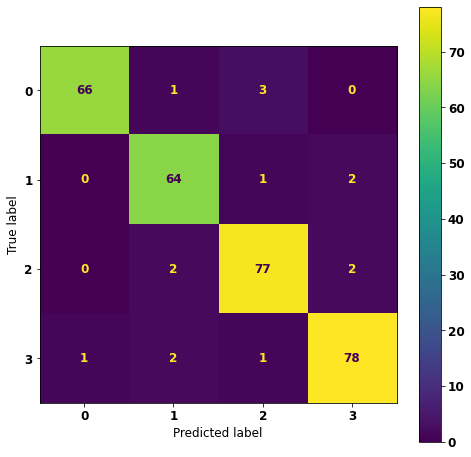

In [28]:
plt.rcParams["figure.figsize"] = (8, 8)

cm = confusion_matrix(y_true=ytest_true, y_pred=y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(ytest_true))
disp.plot()

In [29]:
ytest.shape

(300, 4)

In [30]:
(78 + 77 + 64 + 66)/300

0.95

# Another CNN ( More Filters in Conv & More Neurons in FCL)

In [9]:
from tensorflow.keras import backend as K
K.clear_session()

In [10]:
model_new = Sequential([
    
    # first convolutional and max pooling layer
    Conv2D(filters=7,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu",
          input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2),
                strides=(2, 2),
                padding="valid"),
    #BatchNormalization(), # optional
    
    # Second convolutional and max pooling layer
    Conv2D(filters=17,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu"),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="valid"),
    BatchNormalization(), # optional
    
    # Flatten
    Flatten(),
    
    # Fully connected
    # layer 1
    Dense(120, activation="relu"),
    #Dropout(0.2), # optional
    
    # layer 2
    Dense(90, activation="relu"),
    #Dropout(0.2), # optional
    
    # Output layer
    Dense(4, activation="softmax")
])

In [11]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 7)       532       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 7)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 17)      2992      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 17)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 53, 53, 17)        68        
_________________________________________________________________
flatten (Flatten)            (None, 47753)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5

In [12]:
# Compile
model_new.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [13]:
#fitting
fit_hist = model_new.fit(xtrain, ytrain, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
47/47 [==============================] - 65s 1s/step - loss: 0.5551 - accuracy: 0.8255 - val_loss: 1.8895 - val_accuracy: 0.4313
Epoch 2/10
47/47 [==============================] - 53s 1s/step - loss: 0.3004 - accuracy: 0.9239 - val_loss: 0.9678 - val_accuracy: 0.6173
Epoch 3/10
47/47 [==============================] - 53s 1s/step - loss: 0.0778 - accuracy: 0.9751 - val_loss: 0.7852 - val_accuracy: 0.6739
Epoch 4/10
47/47 [==============================] - 53s 1s/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.4129 - val_accuracy: 0.8571
Epoch 5/10
47/47 [==============================] - 53s 1s/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 0.2498 - val_accuracy: 0.9380
Epoch 6/10
47/47 [==============================] - 53s 1s/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 1.1826 - val_accuracy: 0.6011
Epoch 7/10
47/47 [==============================] - 53s 1s/step - loss: 0.0393 - accuracy: 0.9858 - val_loss: 0.7729 - val_accuracy: 0.7305
Epoch 8/10
47/47 [==

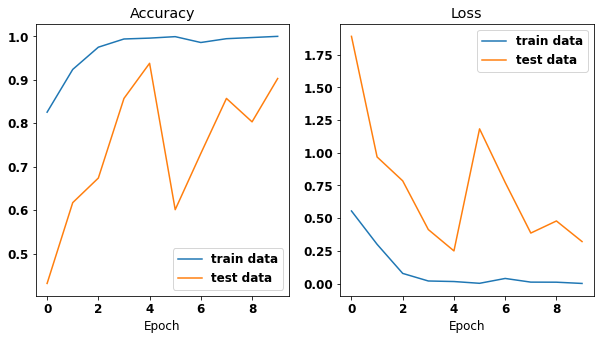

In [15]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.family"] = "monaco"
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "bold"
plt.subplot(1, 2, 1)
plt.plot(fit_hist.history["accuracy"], label="train data")
plt.plot(fit_hist.history["val_accuracy"], label="test data")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(fit_hist.history["loss"], label="train data")
plt.plot(fit_hist.history["val_loss"], label="test data")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend();

In [16]:
df_metrics_new = pd.DataFrame(fit_hist.history)
df_metrics_new

,loss,accuracy,val_loss,val_accuracy
0,0.555072,0.825472,1.889504,0.431267
1,0.300372,0.923854,0.967850,0.617251
2,0.077846,0.975067,0.785237,0.673854
3,0.019945,0.993935,0.412920,0.857143
4,0.015803,0.995957,0.249818,0.938005
5,0.002283,0.999326,1.182642,0.601078
6,0.039334,0.985849,0.772886,0.730458
7,0.011247,0.994609,0.386262,0.857143
8,0.010719,0.997305,0.478605,0.803235
9,0.001180,1.000000,0.321210,0.902965


**Worse results:** 
- Val-Accuracy down to 90%
- val-loss up to 32%


# Third CNN (Changing epochs and adding drpout layer)

In [17]:
model_third = Sequential([
    
    # first convolutional and max pooling layer
    Conv2D(filters=6,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu",
          input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2),
                strides=(2, 2),
                padding="valid"),
    #BatchNormalization(), # optional
    
    # Second convolutional and max pooling layer
    Conv2D(filters=16,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu"),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="valid"),
#     BatchNormalization(), # optional
    
    # Flatten
    Flatten(),
    
    # Fully connected
    # layer 1
    Dense(120, activation="relu"),
    Dropout(0.2), # optional
    
    # layer 2
    Dense(84, activation="relu"),
    Dropout(0.2), # optional
    
    # Output layer
    Dense(4, activation="softmax")
])

In [18]:
# Compile
model_third.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [19]:
#fitting
fit_hist_third = model_third.fit(xtrain, ytrain, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
47/47 [==============================] - 76s 2s/step - loss: 0.7193 - accuracy: 0.7049 - val_loss: 0.3654 - val_accuracy: 0.8733
Epoch 2/15
47/47 [==============================] - 62s 1s/step - loss: 0.2615 - accuracy: 0.9063 - val_loss: 0.2120 - val_accuracy: 0.9299
Epoch 3/15
47/47 [==============================] - 60s 1s/step - loss: 0.1548 - accuracy: 0.9501 - val_loss: 0.2020 - val_accuracy: 0.9407
Epoch 4/15
47/47 [==============================] - 59s 1s/step - loss: 0.0710 - accuracy: 0.9805 - val_loss: 0.1663 - val_accuracy: 0.9596
Epoch 5/15
47/47 [==============================] - 58s 1s/step - loss: 0.0322 - accuracy: 0.9912 - val_loss: 0.1486 - val_accuracy: 0.9488
Epoch 6/15
47/47 [==============================] - 55s 1s/step - loss: 0.0512 - accuracy: 0.9858 - val_loss: 0.3018 - val_accuracy: 0.9111
Epoch 7/15
47/47 [==============================] - 55s 1s/step - loss: 0.0786 - accuracy: 0.9798 - val_loss: 0.1418 - val_accuracy: 0.9596
Epoch 8/15
47/47 [==

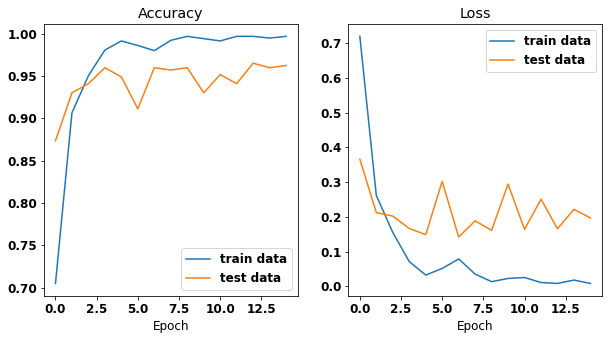

In [20]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.family"] = "monaco"
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "bold"
plt.subplot(1, 2, 1)
plt.plot(fit_hist_third.history["accuracy"], label="train data")
plt.plot(fit_hist_third.history["val_accuracy"], label="test data")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(fit_hist_third.history["loss"], label="train data")
plt.plot(fit_hist_third.history["val_loss"], label="test data")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend();

In [22]:
df_metrics_third = pd.DataFrame(fit_hist_third.history)
df_metrics_third

,loss,accuracy,val_loss,val_accuracy
0,0.719266,0.704852,0.365394,0.873315
1,0.261467,0.906334,0.212039,0.929919
2,0.154816,0.950135,0.201974,0.940701
3,0.070981,0.980458,0.166308,0.959569
4,0.032230,0.991240,0.148641,0.948787
5,0.051171,0.985849,0.301770,0.911051
6,0.078631,0.979784,0.141815,0.959569
7,0.035069,0.991914,0.188225,0.956873
8,0.013196,0.996631,0.161029,0.959569
9,0.022444,0.993935,0.294109,0.929919


**Same results like the main CNN**: 
- Val - Accuracy: 96%
- Val-loss: 20 % (1% increase)


# 4th Modification (Adding Early Stop)

In [23]:
model_4th = Sequential([
    
    # first convolutional and max pooling layer
    Conv2D(filters=6,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu",
          input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2),
                strides=(2, 2),
                padding="valid"),
    #BatchNormalization(), # optional
    
    # Second convolutional and max pooling layer
    Conv2D(filters=16,
          kernel_size=(5,5),
          strides=(1, 1),
          padding="valid",
          activation="relu"),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="valid"),
#     BatchNormalization(), # optional
    
    # Flatten
    Flatten(),
    
    # Fully connected
    # layer 1
    Dense(120, activation="relu"),
    Dropout(0.2), # optional
    
    # layer 2
    Dense(84, activation="relu"),
    Dropout(0.2), # optional
    
    # Output layer
    Dense(4, activation="softmax")
])

In [24]:
# Compile
model_4th.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [25]:
#fitting

from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
fit_hist_4th = model_4th.fit(xtrain, ytrain, batch_size=32, epochs=15, callbacks=[callback], validation_split=0.2)

Epoch 1/15
47/47 [==============================] - 76s 2s/step - loss: 1.0800 - accuracy: 0.5115 - val_loss: 0.4699 - val_accuracy: 0.8544
Epoch 2/15
47/47 [==============================] - 54s 1s/step - loss: 0.3841 - accuracy: 0.8605 - val_loss: 0.4349 - val_accuracy: 0.8113
Epoch 3/15
47/47 [==============================] - 53s 1s/step - loss: 0.2745 - accuracy: 0.9090 - val_loss: 0.2070 - val_accuracy: 0.9515
Epoch 4/15
47/47 [==============================] - 52s 1s/step - loss: 0.1629 - accuracy: 0.9495 - val_loss: 0.2480 - val_accuracy: 0.9245
Epoch 5/15
47/47 [==============================] - 47s 1s/step - loss: 0.0725 - accuracy: 0.9744 - val_loss: 0.1659 - val_accuracy: 0.9515
Epoch 6/15
47/47 [==============================] - 47s 1s/step - loss: 0.0660 - accuracy: 0.9764 - val_loss: 0.1277 - val_accuracy: 0.9623
Epoch 7/15
47/47 [==============================] - 48s 1s/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.2827 - val_accuracy: 0.9245
Epoch 8/15
47/47 [==

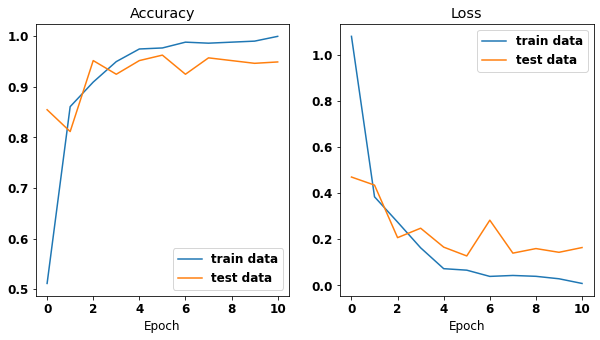

In [26]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.family"] = "monaco"
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "bold"
plt.subplot(1, 2, 1)
plt.plot(fit_hist_4th.history["accuracy"], label="train data")
plt.plot(fit_hist_4th.history["val_accuracy"], label="test data")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(fit_hist_4th.history["loss"], label="train data")
plt.plot(fit_hist_4th.history["val_loss"], label="test data")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend();

In [27]:
df_metrics_4th = pd.DataFrame(fit_hist_4th.history)
df_metrics_4th

,loss,accuracy,val_loss,val_accuracy
0,1.079975,0.511456,0.469867,0.854447
1,0.384096,0.860512,0.434883,0.811321
2,0.274549,0.909030,0.207001,0.951482
3,0.162942,0.949461,0.247958,0.924528
4,0.072457,0.974394,0.165874,0.951482
5,0.065999,0.976415,0.127685,0.962264
6,0.038970,0.987871,0.282740,0.924528
7,0.043035,0.985849,0.139877,0.956873
8,0.039313,0.987871,0.159656,0.951482
9,0.028673,0.989892,0.143462,0.946092


**Nice trade off**: 
- Val - Accuracy(TP): 95% (1 % decrease)
- Val-loss(FP): 16 % (4% decrease)
